In [1]:
import numpy as np # linear algebra
from fastai.vision import * # DL

# Loading & Preprocessing Data

In [2]:
# Data Argumentation
tfms = get_transforms(flip_vert=True)

In [48]:
# Loading & Preprocessing Data
data = ImageDataBunch.from_folder("../input/plantvillage-dataset/", train="color", valid_pct=0.1, size=256, bs=100)

In [49]:
data

ImageDataBunch;

Train: LabelList (293249 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus
Path: ../input/plantvillage-dataset;

Valid: LabelList (32583 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Soybean___healthy,Potato___Late_blight,Tomato___Spider_mites Two-spotted_spider_mite,Orange___Haunglongbing_(Citrus_greening),Pepper,_bell___Bacterial_spot
Path: ../input/plantvillage-dataset;

Test: None

In [50]:
data.batch_stats()

[tensor([0.3821, 0.4075, 0.3508]), tensor([0.2445, 0.2410, 0.2401])]

In [51]:
# Normalising Data 
data.normalize()

ImageDataBunch;

Train: LabelList (293249 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus,Tomato___Tomato_mosaic_virus
Path: ../input/plantvillage-dataset;

Valid: LabelList (32583 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Soybean___healthy,Potato___Late_blight,Tomato___Spider_mites Two-spotted_spider_mite,Orange___Haunglongbing_(Citrus_greening),Pepper,_bell___Bacterial_spot
Path: ../input/plantvillage-dataset;

Test: None

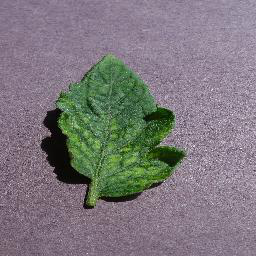

In [52]:
# Showing a smaple image
data.open(data.items[10])

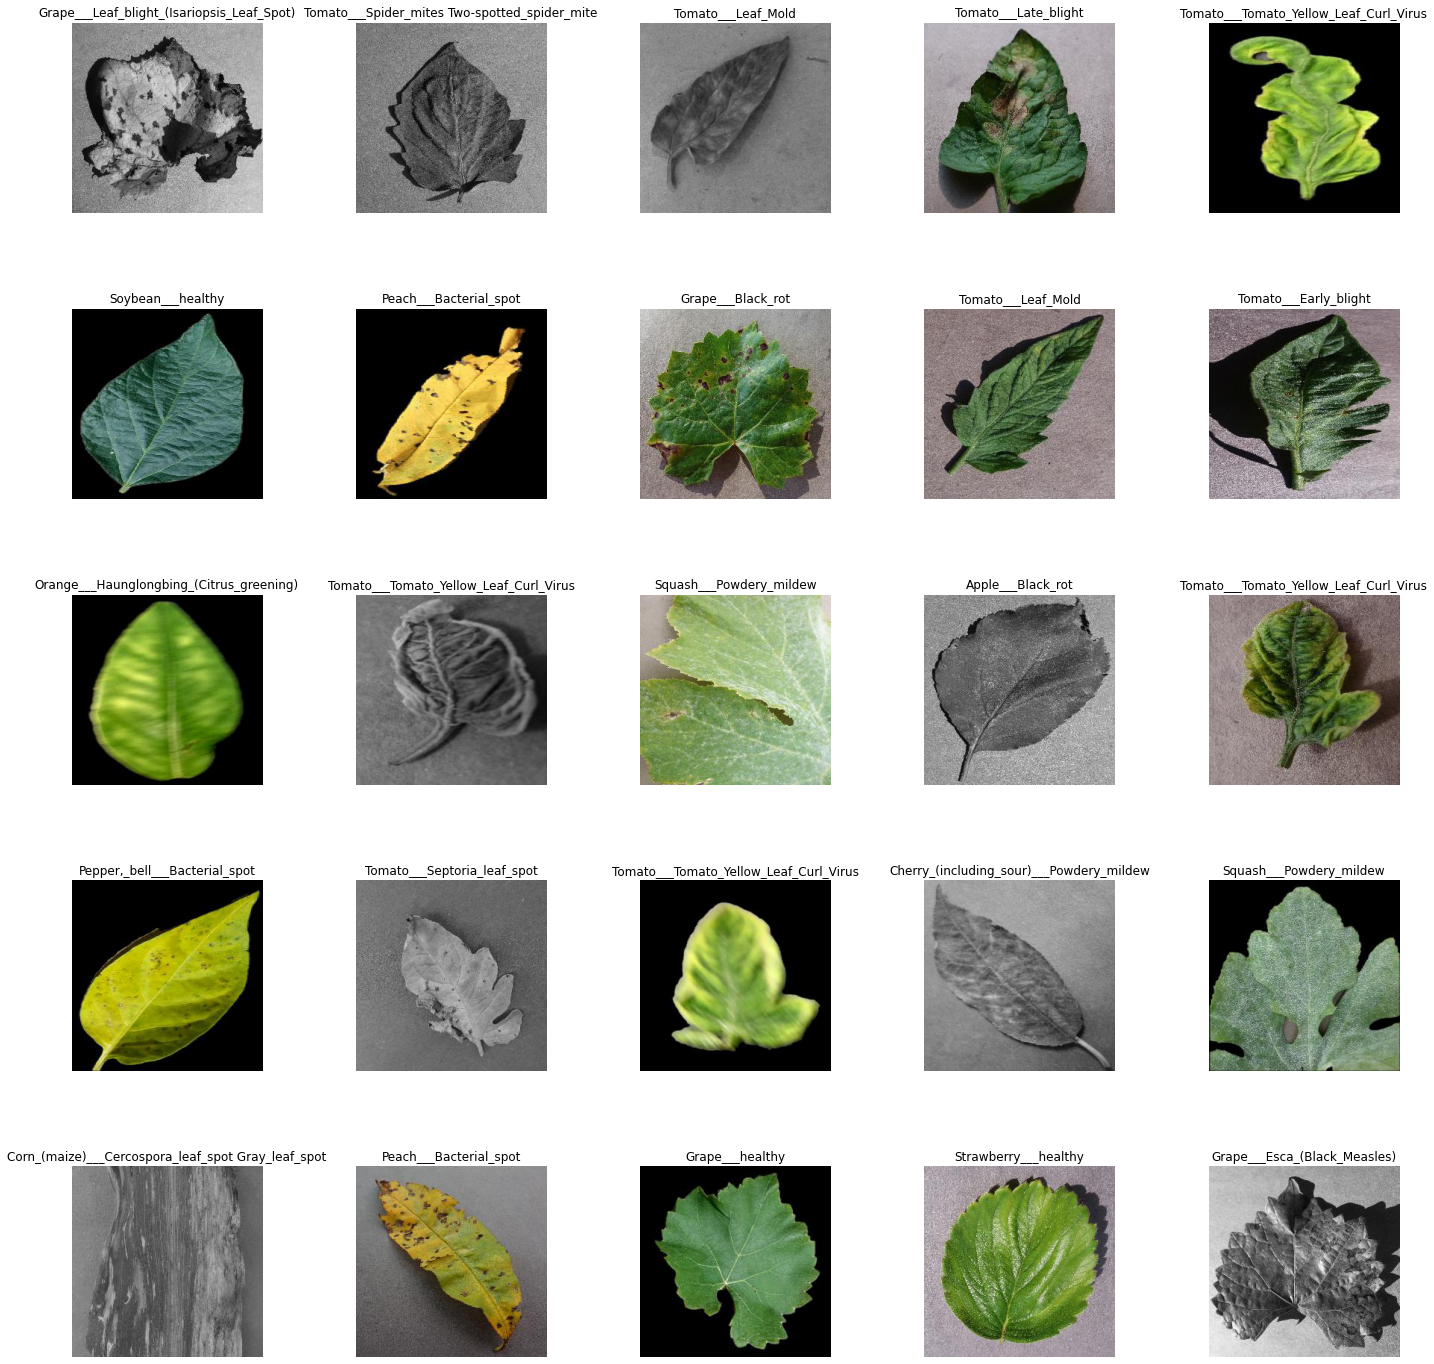

In [53]:
# Showing a batch of images with corresponding labels
data.show_batch()

# Making the Model

In [54]:
# Using ResNet18 model 
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [55]:
learn.data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
# The Model Architecture
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

# Training the Model

In [57]:
# Training Model for 1 Epoch

#learn.fit(5, lr=1e-03)
learn.fit_one_cycle(1)

# Hyperparameter Tuning

In [ ]:
# Finding the best learning rate to increate overall accuracy

learn.lr_find(num_it=1000)

# Getting Results

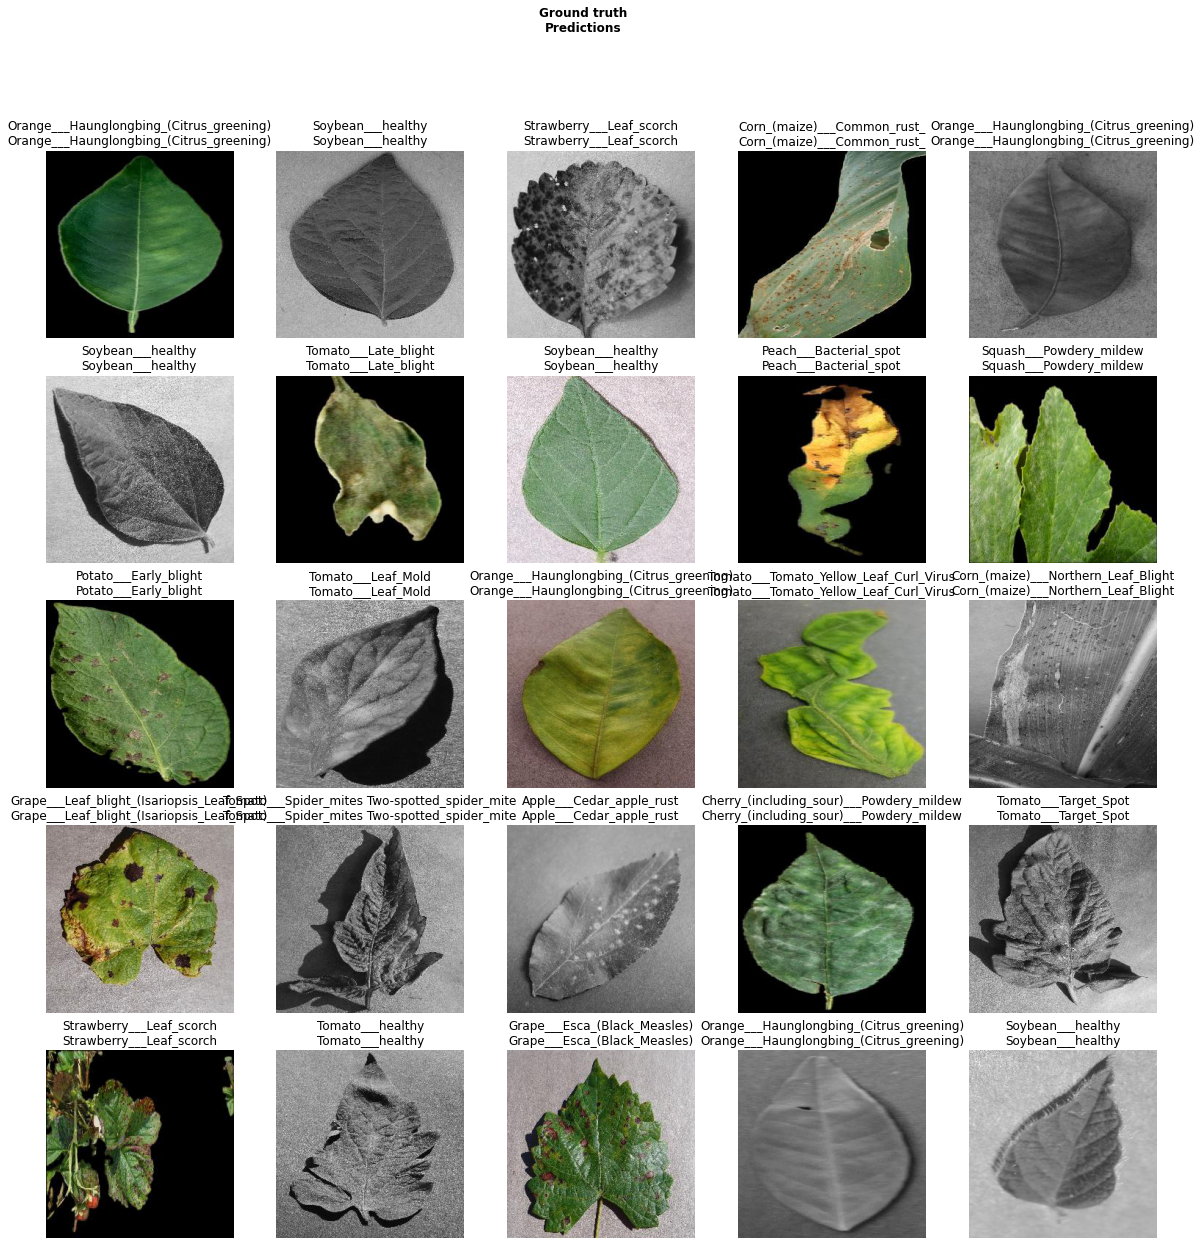

In [59]:
# Showing the results for training data

learn.show_results(ds_type=DatasetType.Train)

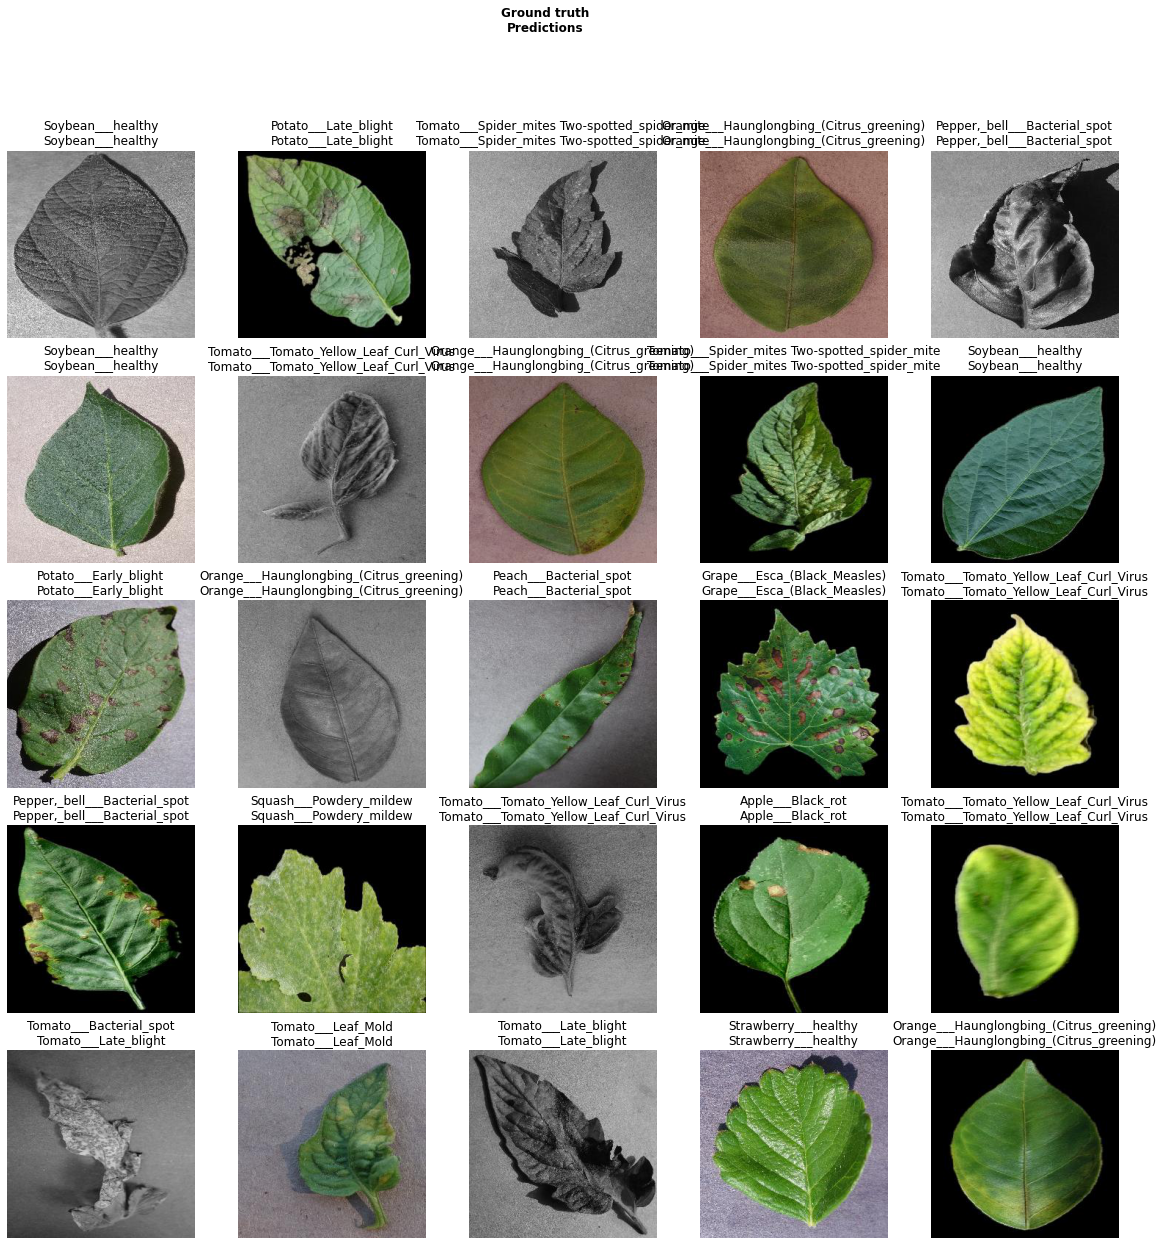

In [60]:
# # Showing the results for validation data

learn.show_results(ds_type=DatasetType.Valid)

In [ ]:
learn.recorder.plot()

In [ ]:
# Plotting loss 

learn.recorder.plot_losses()

In [ ]:
# Plotting Accuracy 

learn.recorder.plot_metrics()

In [63]:
# Getting the confusing matrix

preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.confusion_matrix()

array([[ 337,    2,    1,    4, ...,    0,    1,    0,    1],
       [   1,  368,    0,    2, ...,    0,    0,    0,    0],
       [   0,    0,  170,    2, ...,    0,    0,    0,    0],
       [   4,    0,    0,  964, ...,    1,    0,    0,    1],
       ...,
       [   0,    0,    0,    0, ...,  735,    6,    0,    9],
       [   0,    0,    0,    0, ...,    0, 3202,    0,    0],
       [   0,    0,    0,    0, ...,    0,    2,  221,    0],
       [   0,    0,    0,    0, ...,   11,    1,    0,  997]])

In [64]:
# Seeing in which class model get the most confused
interp.most_confused()

[('Tomato___Early_blight', 'Tomato___Late_blight', 44),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  42),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 38),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 31),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 28),
 ('Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 22),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 22),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 19),
 ('Tomato___Bacterial_spot', 'Tomato___Target_Spot', 17),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Bacterial_spot', 16),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 15),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  14),
 ('Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 11),
 ('Potato___healthy', 'Potato___Late_blight', 11),
 ('Tomato___healthy', 'Tomato___Target

# Exporting thr Model

In [65]:
# Saving the trained model

learn.export(file = Path("/kaggle/working/export.pkl"))